In [10]:
import numpy as np
import matplotlib.pyplot as plt

def LoadData():
    datafile = 'housing.data'
    data = np.fromfile(datafile, sep=' ')
    # 将一维的数组变为506*14的二维数组
    feature_names = [
        'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT', 'MEDV'
    ]
    feature_nums = len(feature_names)
    data = data.reshape([data.shape[0] // feature_nums, feature_nums])
    # 将数据集划分为训练集和测试集
    # 数据集中的前80%作为训练集，后20%作为测试集
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]  # 训练集
    test_data = data[offset:]  # 测试集

    maximums = training_data.max(axis=0)
    minimums = training_data.min(axis=0)

    # 数据归一化 将所有的数据归到（0，1）中
    for i in range(feature_nums):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])
    return training_data, test_data

In [8]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生13个w值
        # 为保证每次结果都不一样，设置固定的随机种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.

    # 前向计算：得到的随机数作为特征值计算得到输出值的过程称为“前向计算”
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    # 计算得到 预测值和实际值的损失值
    def loss(self, z, y):
        error = z - y
        cost = error * error
        cost = np.mean(cost)
        return cost

    def gradient(self, x, y):
        # 前向计算得到新的z
        z = self.forward(x)
        # 使用numpy矩阵计算每一个w的梯度，取每个w权值的平均值，并将其变为列矩阵
        gradient_w = (z - y) * x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        # 使用numpy计算y的梯度
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b, axis=0)
        return gradient_w, gradient_b
    # 沿着梯度的反方向移动步长
    def update(self, gradient_w, gradient_b, eta=0.01):
        self.w = self.w - gradient_w * eta
        self.b = self.b - gradient_b * eta

    # eta为步长，或者可以被称为学习率，iteration为迭代的次数
    def train(self, training_data, num_epoches=100, batch_size = 10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epoches):
            np.random.shuffle(training_data)
            mini_batch = [training_data[k:k+batch_size] for k in range(0,n,batch_size)]
            for iter_id, batch in enumerate(mini_batch):
                x = batch[:,:-1]
                y = batch[:,-1:]
                a = self.forward(x)
                loss = self.loss(a,y)
                gradient_w ,gradient_b = self.gradient(x,y)
                self.update(gradient_w,gradient_b,eta)
                losses.append(loss)
                print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.format(epoch_id, iter_id, loss))
        return losses


In [6]:
training_data, test_data = LoadData()
x = training_data[:, :-1]
y = training_data[:, -1:]
# 建立网络
net = Network(13)
# 获取前三条记录进行预测
x1 = x[0:3]
y1 = y[0:3]
# print(x1)
z = net.forward(x1)
# 得到的值和原值进行损失值计算
loss = net.loss(z, y1)
# print(loss)
# 调用上面定义的gradient函数，计算梯度
# 初始化网络
# 在[w5, w9]平面上，沿着梯度的反方向移动到下一个点P1
    
# 调用上面定义的gradient函数，计算梯度
# 初始化网络
net = Network(13)
# 设置[w5, w9] = [-100., -100.]
net.w[5] = -100.0
net.w[9] = -100.0
    
z = net.forward(x)
loss = net.loss(z, y)
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))


point [-100.0, -100.0], loss 7873.345739941161
gradient [-45.87968288123223, -35.50236884482904]


In [4]:
training_data1 = training_data[0:10]
training_data1.shape

(10, 14)

In [5]:
net = Network(13)
x = training_data1[:,:-1]
y = training_data1[:,-1:]
loss = net.train(x,y,1,0.01)
loss


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# 通过大量实验发现，模型对最后出现的数据印象更加深刻。训练数据导入后，越接近模型训练结束，最后几个批次数据对模型参数的影响越大。为了避免模型记忆影响训练效果，需要进行样本乱序操作。
np.random.shuffle(training_data)
#  每个样本集的大小
batch_size = 10
n = len(training_data)
mini_batch = [training_data[k:k+batch_size] for k in range(0,n,batch_size)]
net = Network(13)
losses = []
for batch in mini_batch:
    x = batch[:,:-1]
    y = batch[:,-1:]
    losses.append(net.train(x,y,1))
losses


  18, loss = 0.1566
Epoch  36 / iter  19, loss = 0.0644
Epoch  36 / iter  20, loss = 0.0153
Epoch  36 / iter  21, loss = 0.0468
Epoch  36 / iter  22, loss = 0.0134
Epoch  36 / iter  23, loss = 0.0145
Epoch  36 / iter  24, loss = 0.0047
Epoch  36 / iter  25, loss = 0.0154
Epoch  36 / iter  26, loss = 0.0198
Epoch  36 / iter  27, loss = 0.0035
Epoch  36 / iter  28, loss = 0.0074
Epoch  36 / iter  29, loss = 0.0303
Epoch  36 / iter  30, loss = 0.0085
Epoch  36 / iter  31, loss = 0.0133
Epoch  36 / iter  32, loss = 0.0136
Epoch  36 / iter  33, loss = 0.0076
Epoch  36 / iter  34, loss = 0.0180
Epoch  36 / iter  35, loss = 0.0135
Epoch  36 / iter  36, loss = 0.0039
Epoch  36 / iter  37, loss = 0.0039
Epoch  36 / iter  38, loss = 0.0107
Epoch  36 / iter  39, loss = 0.0232
Epoch  36 / iter  40, loss = 0.0032
Epoch  37 / iter   0, loss = 0.0130
Epoch  37 / iter   1, loss = 0.0080
Epoch  37 / iter   2, loss = 0.0219
Epoch  37 / iter   3, loss = 0.0084
Epoch  37 / iter   4, loss = 0.0034
Epoch  3

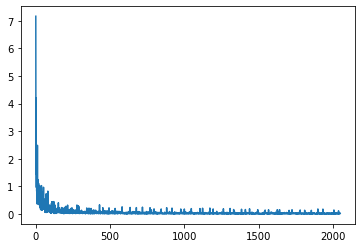

In [11]:
net = Network(13)

losses = net.train(training_data,num_epoches = 50,batch_size = 10,eta = 0.1)

plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()